# Semana 9 do Aceleradev DS Codenation

### Professor: Kazuki Yokoyama | Tema: Classificação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(300)

In [3]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Predict
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

**[Data Catalog](https://cloud.google.com/data-catalog?hl=pt-br)** serve como um repositório de conhecimento unificado

## O que é Classificar?

**Classificar** é **ROTULAR**. Quando temos uma variável que possui cores como valores, ou números (sejam eles com grau intervalar ou não) por exemplo, temos classificacões que tal variável categórica pode assumir. E a idéia de um modelo preditivo de classificação é justamente **aprender como rotular** de acordo com outras variáveis categóricas.

## Tipos de Classificação

A mais simples de todas é a **Classificação Binária**. Nela, temos apenas **duas classes**, sendo chamadas de **classe POSITIVA** e **classe NEGATIVA**. Basicamente, podemos perceber essa classificação como é ou não é.

Agora, quando aumentamos o número de classes para $k$ classes, passamos para um tipo **multiclasses**

## Geometricamente falando...

![decision-boundary](https://miro.medium.com/max/1012/1*i_oYgWjPbXbg3Z2uQLAmtw.png)

Podemos falar de classificação como a arte de gerar uma linha que separa as classes. Essa linha é chamada **fronteira de decisão**. Olhando para a figura, percebemos que a fronteira separa muito bem as duas classes, mas erra em alguns pontos. Porém, esses pontos nos ajudam a criar algumas métricas de avaliação desse modelo de classificação

## Matriz de Confusão

É uma representação tabular dos erros e acertos de um classificador, sumarizando as quantidade dos pontos classificados de maneira errada e correta.

![confusion-matrix](https://drive.google.com/uc?export=download&id=1Li5Ep-5PRpua2vtQLXHvltaeGsr-lftZ)

Similar ao **Teste de Hipóteses** temos os mesmos dois tipos de erros na matriz de confusão:

- Falso Positivo (FP): representa o **Erro Tipo I**. Nele, classificamos um valor **verdadeiramente negativo** como **positivo**

- Falso Negativo (FN): representa o **Erro Tipo II**. Nesse, classificamos um valor **verdadeiramente positivo** como **negativo**

Olhando a matriz, fica claro o objetivo em **maximizar** (TP) e (TN) e **minimizar** (FN) e (FP). Entretanto, em determinador momentos, será possível minimizar apenas (FP) ou (FN). Nesse momento, deve-se priorizar qual é menos custoso.

Como dito, os pontos errados ajudam a gerar algumas métricas importantes de avaliação do modelo classificatório, mas os (TP) e (TN) também ajudam, como podemos ver na imagem abaixo:

![confusion-matrix-metrics](https://drive.google.com/uc?export=download&id=1GUQs3pT07UJVGTINPNEHE0ACrr1_FYOk)

Com o auxílio da imagem, podemos entender essas métricas:

- precision

$$\frac{TP}{TP+FP}=1-FDR$$

- false discovery rate (FDR)

$$\frac{FP}{TP+FP}=1-precision$$

- miss rate

$$\frac{FN}{FN+TP}=1-recall$$

- recall (sensitivity), ou True Positive Ratio - TPR

$$\frac{TP}{FN+TP}=1-\text{miss rate}$$

- negative predictive value (NPV)

$$\frac{TN}{TN+FN}=1-\text{false omission rate}$$

- false omission rate

$$\frac{FN}{TN+FN}=1-NPV$$

- fall out, ou False Positive Ratio - FPR

$$\frac{FP}{FP+TN}=1-specificity$$

- specificity

$$\frac{TN}{FP+TN}=1-\text{fall out}$$

Temos outras duas métricas importantes:

- accuracy

$$\frac{TP+TN}{P+N}\text{, sendo P os POSITIVOS e N os NEGATIVOS}$$

- $F_1-score$

$$\frac{2\times precision \times recall}{precision+recall}$$

## Curva ROC

![auc](https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

![roc](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/ROC_space-2.png/1024px-ROC_space-2.png)

A curva **ROC** é feita num gráfico cartesiano onde o x representa o **fall out $\frac{FP}{FP+TN}$**, e o y representa **recall $\frac{TP}{TP+FN}$**. Essa curva pode ser vista como uma fronteira de decisão, sendo que cada problema **tem uma curva ROC diferente**. Ou seja, estamos falando de uma curva que abaixo dela temos uma probabilidade. Por exemplo, para um problema que existe .6 de chance de ser classificado como uma classe **POSITIVA**, qualquer ponto acima dessa curva de área .6 será classificado como **POSITIVO**. Já os pontos que caem abaixo da curva, justamente a região **NEGATIVA** da curva ROC.

Idealmente, um classificador deveria ser um ponto apenas: o ponto (0, 1). Esse representa um **recall=1**. No entando, observamos uma curva que vai de (0, 0) até (1, 1):

***threshold = 0***

Para essa condição, todos os pontos serão classificados como 1, pois as probabilidades dos pontos serem de *classe 1* serão **SEMPRE MAIORES que o limite igual a 0**. E o que isso implica?

- (FN) = 0
    
    Como **TODOS** serao classificados como 1, não teremos valores *classe 1* sendo classificadas como *classe 0*


- (TN) = 0
    
    Como **TODOS** serao classificados como 1, não teremos valores *classe 0* sendo classificados como *classe 0*


- TPR = 1
    
$$TPR=\frac{TP}{TP+FN}=1\text{, pois FN=0}$$

- FPR = 1
    
$$FPR=\frac{FP}{FP+TN}=1\text{, pois TN=0}$$

***threshold = 1***

Para essa condição, todos os pontos serão classificados como 0, pois as probabilidades dos pontos serem de *classe 1* serão **SEMPRE MENORES que o limite igual a 1**. E o que isso implica?

- (FP) = 0
    
    Como **TODOS** serão classificados como 0, não teremos valores *classe 0* sendo classificados como *classe 1*


- (TP) = 0
    
    Como **TODOS** serao classificados como 0, não teremos valores *classe 1* sendo classificados como *classe 1*


- TPR = 0
    
    
$$TPR=\frac{TP}{TP+FN}=0\text{, pois TP=0}$$

- FPR = 0
    
$$FPR=\frac{FP}{FP+TN}=0\text{, pois FP=0}$$
    
***0 < threshold < 1***

Nessa condição, temos o que vemos na curva **ROC**, um *balanço* entre **TPR** e **FPR**

**Reta *Random Guess***

Nessa reta, temos o seguinte cenário: a proporção de valores *classe 1* que foram classificados como *classe 1* é **IGUAL** a de *classes 0* que foram classificados como *classe 1*. Ou seja, temos a mesma proporção entre (TP) e (FP)

O classificador trivial *random guess* é um classificador que faz classificações aleatórias, tão somente baseadas nas proporções de dados da classe negativa e positiva do *data set*. O seu desempenho é capturado pela curva $y = x$ no plano cartesiano **recall x fall out**. Como queremos ter um modelo que seja melhor que o classificador aleatório, **devemos buscar um classificador cujo ROC seja uma curva sempre acima da reta $y = x$**. Curvas abaixo da reta $y = x$ significam que o classificador se comporta pior do que chutes aleatórios sobre as classes.

Apesar de visualmente ser fácil avaliar o desempenho de um classificador usando a curva ROC, é difícil comparar o desempenho geral de múltiplos classificadores. Uma forma de sumarizar o desempenho do classificador usando o ROC é através da **área embaixo da curva ROC: AUC (*Area Under Curve*)**.

## Área abaixo da curva ROC

Essa área nos diz quão bom um modelo de classificação é em distringuir classes.

**Imagine...**

Temos um problema binário, e queremos saber quem pertence à que classe. Então, podemos **calcular a probabilidade** de cada ponto (indivíduo) pertencer à uma determinada classe. Feito isso, podemos ter um gráfico dessa maneira:

![gráfico](https://miro.medium.com/max/493/1*HxNvqTl-Pd63niUIbrD4pg.jpeg)

Esse gráfico tem no $x$ os valores das probabilidades, e em $y$ valores de frequência, sendo *vermelho* os classificados como *classe 0 e *verde* os classificados como *classe 1*. **Note:** existem indivíduos da *classe 0* com baixa probabilidade de ser *classe 1*, como também existem indivíduos (poucos) que tem uma chance apreciável (0.6) de ser *classe 1*, mas estão classificados como *classe 0*. De maneira análoga, temos indivíduos classificados como *classe 1* com pequena chance (0.4) de ser dessa classe. Feita essa observação, vamos continuar...

Agora, só a probabilidade não é suficiente para classificar um indivíduo, pois ela revela uma **chance** em ser *classe 0* ou *classe 1*. Se um indivíduo tem 0.8 de chance de ser *A*, ele tem 0.2 de ser *B*. Embora seja uma probabilidade alta, **não temos certeza absoluta**. Diante disso, devemos adotar um ***Threshold***. Vamos adotar o bom e velho 0.5. Como mostra o gráfico abaixo:

![gráfico](https://miro.medium.com/max/493/1*qLjMtrdG3qIcuNBALvsYQA.jpeg)

Agora, quem tem probabilidade **acima** do limite, é **classe 1**. E quem tem probabilidade **abaixo**, é **classe 0**. Vamos analisar as duas porções separadamente:

- abaixo do limite
    
    
    - São considerados (TN) os classificados como classe 0 que estão abaixo do limite.
    
    - São considerados (FN) os classificados como classe 0 que estão abaixo do limite.


- acima do limite


    - São considerados (TP) os classificados como *classe 1* que estão acima do limite.
    
    - São considerados (FP) os classificados como *classe 1* que estão acima do limite.


Para melhor entender, olhe a imagem abaixo:

![grafico](https://miro.medium.com/max/493/1*Bwhr9ots47akHbrgssKXrA.jpeg)

Percebeu que aqueles casos com baixa possibilidade de ser *classe 1*, mas que são, e aqueles com chance apreciável de serem *classe 1*, mas não são, são **fortemente impactados** pelo **threshold**? E nesse cenário, as métricas que avaliam o classificador são impactadas, duas delas vão funcionar como uma espécie de *trade-off*: **Recall ($\frac{TP}{TP+FN}$)** e **Specificity ($\frac{TN}{TN+FP}$)**. Olhando para as duas fórmulas, percebe-se que (TN) e (TP) continuam os mesmos à medida que mudamos o limite, mas (FP) e (FN) mudam. E quando mudamos o limite, **uma métrica aumenta**, e a outra **diminui**. Podemos ver isso no gráfico abaixo:

![grafico](https://miro.medium.com/max/291/1*ceB9hobuBUjnPpRKedA-VA.png)

Mas a curva **ROC** não tem essa cara, para gerar ela, usamos **(1 - Specificity)**. Fazendo a brincadeira com frações, descobrimos que isso nada mais é que o nosso **Fall Out**, ou **FPR**. Agora temos a nossa curva **ROC**

![grafico](https://miro.medium.com/max/292/1*QqZzGJwzYxnHWZ_axq6ynA.png)

*E por que fazemos isso?*

Vimos que o limite é uma medida arbitrária, e que impacta no entendimento do que é um bom classificador ou ruim. Então, devemos ter uma medida **que impacte igualmente os eixos** do gráfico. E com **TPR** e **FPR**, conseguimos isso. Agora, quando **aumentamos o threshold** nós **diminuimos tanto o FPR quanto o TPR**, e quando **diminuímos o threshold**, aumentamos **ambos**. Vejamos:

![grafico](https://miro.medium.com/max/493/1*Bwhr9ots47akHbrgssKXrA.jpeg)

$\uparrow Limite:$

- $(TN)$ e $(TP)$ permanescem constante

- $\downarrow (FP)$ e $\uparrow (FN)$
    
$$TPR=\frac{TP}{TP+\uparrow FN} \therefore \downarrow TPR$$

$$FPR=\frac{\downarrow FP}{\downarrow FP+TN} \therefore \downarrow TPR$$


$\downarrow Limite:$

- $(TN)$ e $(TP)$ permanescem constante

- $\uparrow (FP)$ e $\downarrow (FN)$
    
$$TPR=\frac{TP}{TP+\downarrow FN} \therefore \uparrow TPR$$

$$FPR=\frac{\uparrow FP}{\uparrow FP+TN} \therefore \uparrow TPR$$

Agora, nós temos um gráfico não tão dependente do limite. Com isso, vamos analisar o que a área em baixo da curva **ROC** quer dizer:

Mais Espaçados             |  Menos Espaçados
:-------------------------:|:-------------------------:
![grafico1](https://miro.medium.com/max/406/1*AgDJbm6d8qr8ESHNv6VvKg.png)  |  ![grafico2](https://miro.medium.com/max/405/1*KNhNw8BsjbIETPF_BH8Qpg.png)

Fica claro que: quanto mais espaçadas as classes, mais distintos são os *True Values*, e menos (FP) e (FN) temos. Diante disso, a **área da curva ROC mede quão separadas estão as probabilidades de (TN) e (TP)**. E, à medida que elas estão mais separadas, **maior a área da curva ROC**

## Criando Dataset para Classificação

In [4]:
from sklearn.datasets import make_blobs

Vamos gerar um conjunto de dados com 500 indivíduos e 2 classes

In [5]:
X, Y = make_blobs(n_samples=500, centers=2, cluster_std=2.)

In [6]:
X.shape, Y.shape

((500, 2), (500,))

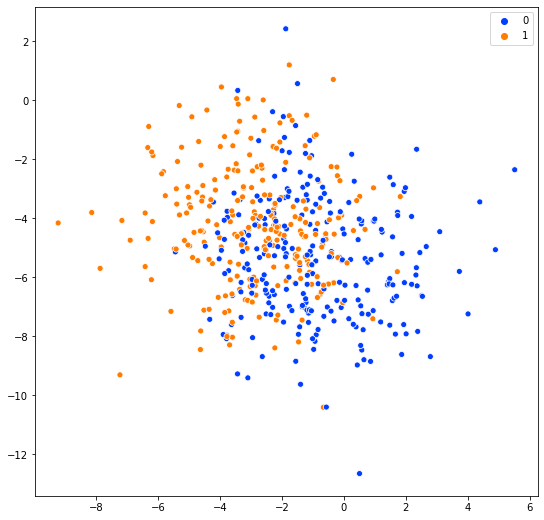

In [7]:
plt.figure(figsize=(9, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='bright')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X, Y, test_size=.2)

In [10]:
x_treino.shape, x_teste.shape

((400, 2), (100, 2))

## Regressão Logística

Esse modelo é muito empregado em problemas binários, mas não unicamente usado, necessariamente, em modelos binários.

Nesse modelo **paramétrico**, a função utilizada retorna uma probabilidade: ser **positivo** ou **negativo**, e é escrita abaixo:

$$p(X) = \frac{e^{\beta_{0} + \beta_{1}X}}{1 + e^{\beta_{0} + \beta_{1}X}}$$

Olhando para os coeficientes $\beta_0, \beta_1$, percebemos que eles não são lineares. E para uma regressão linear, isso não serve. Então, devemos fazer uma matemágica para deixar essa função linearizável. Diante disso:

$$\ln{\frac{p(X)}{1 - p(X)}} = \beta_{0} + \beta_{1}X$$

Agora é possível aplicar uma regressão, pois é uma função linear nos parâmetros $\beta_0, \beta_1$.

![logistic](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png)

Então, com a função linearizada, obtemos os coeficientes $\beta_0, \beta_1$, e podemos gerar um gráfico tal qual o de cima. Perceba que $p(x)$ está condicionado entre $[0, 1]$. Para uma probabilidade, que conveniente é o que estamos lidando, é muito oportuno. Assim, podemos encontrar a **probabilidade de $x$ ser de classe positiva ou negativa**. Se $p(x)\geq.5$, $x$ tem maior chance de ser de classe **positiva** $Y=1$. Se for menor, chance de ser **negativa** $Y=0$. Mas esse .5 pode ser modificado se quisermos.

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
reg_log = LogisticRegression()

**treino**

In [13]:
reg_log.fit(x_treino, y_treino)

LogisticRegression()

In [14]:
reg_log.intercept_

array([0.07159402])

In [15]:
reg_log.coef_

array([[-0.51825563,  0.22648911]])

In [16]:
reg_log.classes_

array([0, 1])

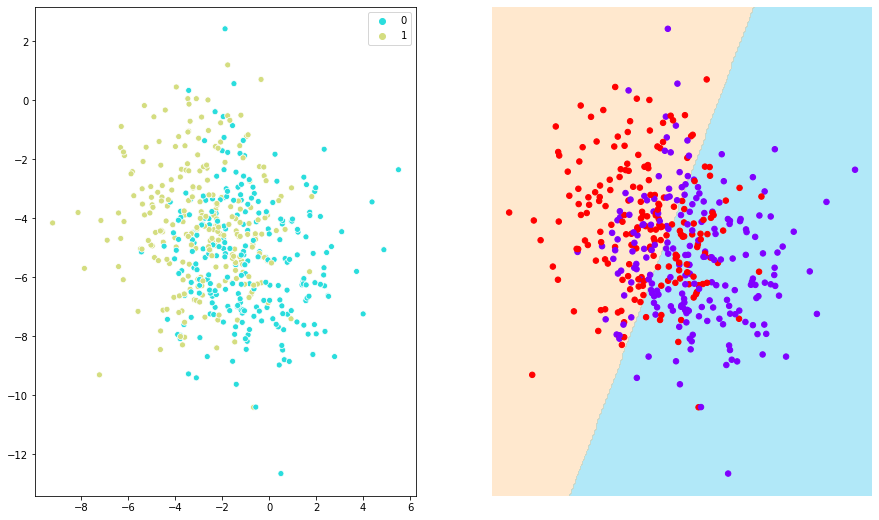

In [17]:
fig, g = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='rainbow', ax=g[0])
visualize_classifier(reg_log, x_treino, y_treino, ax=g[1])
plt.show()

**teste**

In [18]:
previsto_log = reg_log.predict(x_teste)

In [19]:
pd.DataFrame(data={
    '1': x_teste[:, 0],
    '2': x_teste[:, 1],
    'target_previsto': previsto_log,
    'target_real': y_teste
}).head(7)

,1,2,target_previsto,target_real
0,-3.458875,0.049979,1,1
1,1.986477,-2.971032,0,0
2,-1.770848,-3.091978,1,0
3,-1.170812,-5.447947,0,1
4,-1.465835,-5.050420,0,1
5,-6.315420,-4.689623,1,1
6,-2.221146,-3.506250,1,1


Podemos calcular algumas probabilidades interessantes com o modelo treinado

**Qual classe um determinado ponto pertence?**

Ponto: (12.5, 5)

- olhando para o gráfico acima, podemos perceber que esse ponto percente à classe 1

Ponto: (4., 12.)

- olhando para o gráfico acima, podemos perceber que esse ponto pertence à classe 0

In [20]:
reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))

array([[0.99490382, 0.00509618],
       [0.32817721, 0.67182279]])

In [21]:
print('Ponto (12.5, 5.):\n')
print(f'classe 0: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[0,0]:.3f}')
print(f'classe 1: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[0,1]:.3f}')

Ponto (12.5, 5.):

classe 0: 0.995
classe 1: 0.005


In [22]:
print('Ponto (4., 12.):\n')
print(f'classe 0: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[1,0]:.3f}')
print(f'classe 1: {reg_log.predict_proba(np.array(([12.5, 5.], [4., 12.])))[1,1]:.3f}')

Ponto (4., 12.):

classe 0: 0.328
classe 1: 0.672


Como é possível perceber, as probabilidades são muito maiores nas classes que acreditamos que os pontos pertencem de acordo com o gráfico fronteiriço.

Tem como saber qual classe o ponto pertence, diferente da probabilidade de pertencimento. Basta usar o `predict` para um ponto só

Ponto (12.5, 5.):

In [23]:
reg_log.predict(np.array(([12.5, 5.])).reshape(1, -1))

array([0])

## Métricas

Vamos aplicar as métricas da **Matriz de Confusão** e **Curva ROC** aos resultados desse modelo de regressão logística

**Accuracy**

Com essa métrica, podemos saber **com que frequência esse classificador está correto**

In [24]:
from sklearn.metrics import accuracy_score

Vemos que nosso classificador está certo em:

In [25]:
accuracy_score(y_pred=previsto_log, y_true=y_teste)

0.69

**Confusion Matrix**

In [26]:
from sklearn.metrics import confusion_matrix

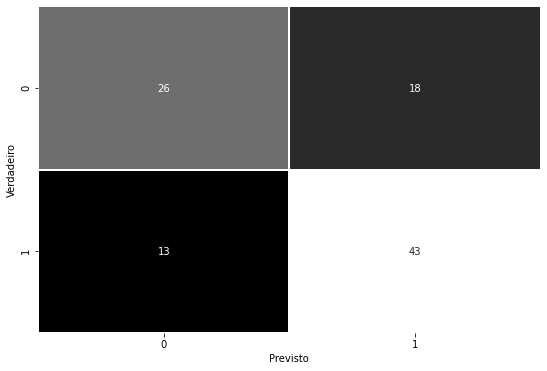

In [27]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred=previsto_log, y_true=y_teste), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

Nessa matriz, temos:

In [28]:
(TN, FP), (FN, TP) = confusion_matrix(y_pred=previsto_log, y_true=y_teste)

In [29]:
print(f'(TN) é 0 e foi classificado como 0: ', TN)
print(f'(TP) é 1 e foi classificado como 1: ', TP)
print(f'(FP) é 0 mas foi classificado como 1: ', FP)
print(f'(FN) é 1 mas foi classificado como 0: ', FN)

(TN) é 0 e foi classificado como 0:  26
(TP) é 1 e foi classificado como 1:  43
(FP) é 0 mas foi classificado como 1:  18
(FN) é 1 mas foi classificado como 0:  13


Outra forma de ler:

In [30]:
print(f'(P) é (TP) + (FN): ', TP+FN)
print(f'(N) é (TN) + (FP): ', TN+FP)

(P) é (TP) + (FN):  56
(N) é (TN) + (FP):  44


Olhando dessa maneira, fica fácil entender o valor de **Accuracy**

**Recall, Sensitivity, ou TPR (True Positive Ratio)**

como escrito lá em cima:

$$\frac{TP}{TP+FN}$$

Com essa métrica, queremos saber **quando é um valor realmente POSITIVO, com que frequência o classificador ACERTA**. Essa métrica é usada quando objetivo é limitar a quantidade de falso negativos. Ou seja, quando temos 1 mas são classificados como 0 (falso 0).

In [31]:
from sklearn.metrics import recall_score

Ou seja, de 100% dos dados **realmente POSITIVOS**, o classificador acerta: 

In [32]:
recall_score(y_pred=previsto_log, y_true=y_teste)

0.7678571428571429

**Fall Out, ou FPR (False Positive Ratio)**

como escrito lá em cima:

$$\frac{FP}{TN+FP}$$

Com essa métrica, queremos saber **quando é um valor realmente NEGATIVO, com que frequência o classificador ERRA**

Ou seja, dos dados **realmente NEGATIVOS**, o classificador erra:

In [36]:
FP / (TN + FP)

0.4090909090909091

**Precision**

como escrito lá em cima:

$$\frac{TP}{TP+FP}$$

Com essa métrica, queremos saber **quando o modelo prevê um valor POSITIVO, com que frequência o classificador ACERTA**. Essa métrica é usada quando o objetivo é limitar a quantidade de (FP). Ou seja, quando queremos limitar a quantidade de 0 que são classificados como 1 (falsos 1).

In [37]:
from sklearn.metrics import precision_score

Ou seja, quando o modelo prevê um valor **POSITIVO**, ele acerta:

In [38]:
precision_score(y_pred=previsto_log, y_true=y_teste)

0.7049180327868853

**F_1-score**

como escrito lá em cima:

$$\frac{2\times precision \times recall}{precision+recall}$$

Essa métrica é interessante quando queremos analisar, ao mesmo tempo, o **recall** e a **precision**. Ela representa a **média harmônica** entre as duas métricas

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_pred=previsto_log, y_true=y_teste)

0.7350427350427351

Ainda existe uma função que retorna um resumo das métricas do classificador

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_pred=previsto_log, y_true=y_teste))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63        44
           1       0.70      0.77      0.74        56

    accuracy                           0.69       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.69      0.69       100



**Curva ROC**

Como visto, é uma curva que possui seus eixos *x e y* representados por FPR e TPR respectivamente

In [43]:
from sklearn.metrics import roc_curve

Primeiro, precisamos encontrar a probabilidade associada ao ponto. Nesse caso, vamos usar a **probabilidade de ser da *classe 1***

In [44]:
previsto_probab = reg_log.predict_proba(x_teste)[:, 1]

In [45]:
TPR, FPR, thresholds = roc_curve(y_true=y_teste, y_score=previsto_probab)

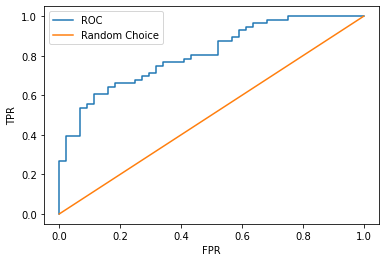

In [46]:
plt.plot(TPR, FPR, label='ROC')
plt.plot([0, 1], [0, 1], label='Random Choice')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Área abaixo da curva ROC**

Uma medida muito boa para avaliar se o classificador é bom, como vimos lá em cima, é obter a área abaixo da curva ROC, área essa que varia dentro [0, 1]. Se o valor é próximo de 0.5, é sinal que o classificador é tão bom quando um chute. Se for maior que 0.5, é melhor que classificar na sorte. Por fim, se for menor que 0.5, o classificador é ruim.

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
roc_auc_score(y_true=y_teste, y_score=previsto_probab)

0.807224025974026

E como estamos pegando a área, não existe nenhuma relação a qualquer espécie de limite. Então, essa área não nos diz qual o limite útil para obtermos um bom classificador

## Naive Bayes Classificator - MultinomialNB

Esse classificador é muito bom para *datasets* de variáveis **discretas**

In [49]:
from sklearn.naive_bayes import MultinomialNB

Como temos valores tipo *float* e valores *negativos* nesse *dataset*, não será possível usá-lo.

## $k$NN - Key Nearest Neighbors

Nesse modelo **não paramétrico**, não precisamos treinar um modelo, podemos fazer as predições direto dos dados de treino.

![knn](https://miro.medium.com/max/1300/0*Sk18h9op6uK9EpT8.)

O método atribui, ao ao ponto $X$ de teste que queremos classificar, a **classe majoritária entre os *k* pontos de treino mais próximos** à $X$. E essa proximidade é medida pela distância Euclidiana. E para fazer o classificador de **KNN** rodar, passamos somente o **número de vizinhos *k***, sendo esse valor encontrado por *cross-validation* para melhor predição.

**Nota:** Como não é necessário treinar um modelo, esse classificador tem uma fraqueza: é necessário manter em memória todo o conjunto de treinamento para fazer predições.

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)

**treino**

In [52]:
knn.fit(x_treino, y_treino)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [53]:
knn.classes_

array([0, 1])

In [54]:
knn.leaf_size

20

In [55]:
knn.n_features_in_

2

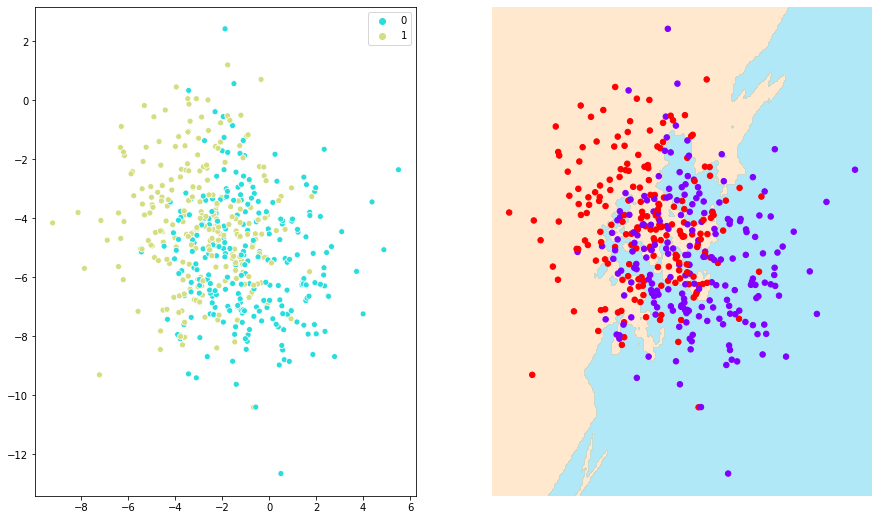

In [56]:
fig, g = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='rainbow', ax=g[0])
visualize_classifier(knn, x_treino, y_treino, ax=g[1])
plt.show()

**teste**

In [57]:
previsto_knn = knn.predict(x_teste)

## Métricas

**Confusion Matrix**

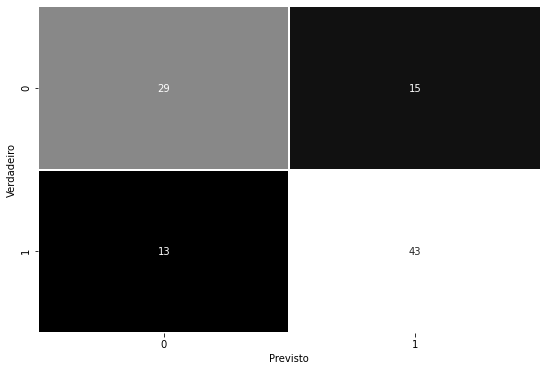

In [58]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred=previsto_knn, y_true=y_teste), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [59]:
(TN_knn, FP_knn), (FN_knn, TP_knn) = confusion_matrix(y_pred=previsto_knn, y_true=y_teste)

In [60]:
print(f'(TN) é 0 e foi classificado como 0: ', TN_knn)
print(f'(TP) é 1 e foi classificado como 1: ', TP_knn)
print(f'(FP) é 0 mas foi classificado como 1: ', FP_knn)
print(f'(FN) é 1 mas foi classificado como 0: ', FN_knn)

(TN) é 0 e foi classificado como 0:  29
(TP) é 1 e foi classificado como 1:  43
(FP) é 0 mas foi classificado como 1:  15
(FN) é 1 mas foi classificado como 0:  13


**Accuracy**

In [61]:
accuracy_score(y_pred=previsto_knn, y_true=y_teste)

0.72

**Recall, Sensitivity, ou TPR (True Positive Ratio)**

$$\frac{TP}{TP+FN}$$

Com essa métrica, queremos saber **quando é um valor realmente POSITIVO, com que frequência o classificador ACERTA**.

In [62]:
recall_score(y_pred=previsto_knn, y_true=y_teste)

0.7678571428571429

**Fall Out, ou FPR (False Positive Ratio)**

$$\frac{FP}{TN+FP}$$

Com essa métrica, queremos saber **quando é um valor realmente NEGATIVO, com que frequência o classificador ERRA**

In [63]:
FP_knn/(FP_knn+TN_knn)

0.3409090909090909

**Precision**

$$\frac{TP}{TP+FP}$$

Com essa métrica, queremos saber **quando o modelo prevê um valor POSITIVO, com que frequência o classificador ACERTA**.

In [64]:
precision_score(y_pred=previsto_knn, y_true=y_teste)

0.7413793103448276

**ROC curve**

Primeiro, precisamos encontrar a probabilidade associada ao ponto. Nesse caso, vamos usar a **probabilidade de ser da *classe 1***

In [65]:
previsto_probab_knn = knn.predict_proba(x_teste)[:, 1]

In [66]:
TPR_knn, FPR_knn, thresholds_knn = roc_curve(y_true=y_teste, y_score=previsto_probab_knn)

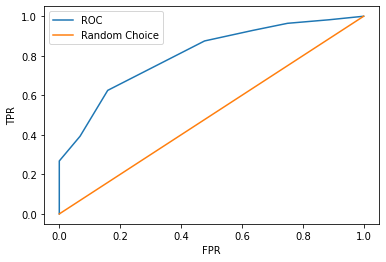

In [67]:
plt.plot(TPR_knn, FPR_knn, label='ROC')
plt.plot([0, 1], [0, 1], label='Random Choice')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Área abaixo de ROC**

In [68]:
roc_auc_score(y_true=y_teste, y_score=previsto_knn)

0.7134740259740261

## Árvore de Decisão

Esse método pode ser usado tanto para regressão quanto classificação. Tem bom desempenho e pode ser usado para criação de *ensembles* (conjuntos).

**Como Funciona?**

A cada passo, escolhemos uma variável e a dividimos em duas partes de acordo com uma métrica. Recursivamente, refazemos outra divisão, o que vai gerando uma **árvore binária**. E esse procedimento recurssivo vai se repetindo até ser atendida uma determinada condição de parada. Podemos ter uma idéia com a imagem:

![decision-tree](https://drive.google.com/uc?export=download&id=1fGeYNLedFWkn6bxdtljS3haJOZ10SoXb)

*Primeiro Nodo:*

    Separa os dados em DOIS GRUPOS: os com petal_length menor igual a 2.45 e os maiores. Esses grupos são NODOS FOLHA, um à esqueda e outro à direita.

*Nodo Folha à esquerda:*
    
    Esse nodo parece que chegou a uma condição de PUREZA. Ou seja, todos os valores que caíram nessa região pertencem à uma única classe.

*Nodo Folha à direita:*
    
    Já nesse nodo, como não existe uma situação de pureza, nascem mais dois nodos folha abaixo, sendo estes separados por uma nova variável: petal_width. E como podemos ver, o valor de separação está entre os menores igual 1.75 e maior.

*Nodos Folha do Nodo Folha à direita:*
    
    Por fim, chegamos a mais dois nodos, e como um determinado grau de pureza foi alcançado, não geraram filhos.

**O que é essa *pureza*?**

Como métrica usada para geração, ou não, de outros nodos folhas, essa tal *pureza* foi utilizada. Ela pode ser o **Índice de Gini** ou a **Entropia**. Basicamente, à cada nodo, as classes estão misturadas, e esse grau de mistura é medido por esses índices. O que a Árvore de Decisão faz é escolher variáveis diferentes a cada nodo para tentar diminuir essa mistura de classes, gerando nodos folha *mais puros*, até chegar num momento que essa pureza é tamanha que só existem indivíduos de **uma classe apenas** no determinado nodo folha.

Índice de Gini            |  Entropia
:-------------------------:|:-------------------------:
$$G_{m} = 1 - \sum_{1 \leq k \leq K} \hat{p}_{m,k}^{2}$$  |  $$G_{m} = - \sum_{1 \leq k \leq K} \hat{p}_{m,k} \log_{2}{\hat{p}_{m,k}}$$

onde $K$ é o número total de classes.

Estimamos $\hat{p}_{m,k}$ como a fração de dados da classe $k$ na região do espaço de _features_ delimitiado no nodo $m$.

Quanto mais próximo de zero o **índice de Gini**, maior a pureza. Em outras palavras, índices de Gini mais baixos representam regiões mais homogêneas.

A **entropia**, apesar do sinal negativo, é sempre um valor positivo. Quanto mais alta, mais impureza (ou menos homogeneidade), há naquela região.

O índice de Gini tende a isolar classes mais frequentes em ramificações separadas da árvore, enquanto a entropia gera árvores mais balanceadas. No geral, elas não costumam apresentar essas diferenças, e levam à árvores muito semelhantes.

In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [70]:
arv_dec = DecisionTreeClassifier(criterion='gini', max_depth=None)

**treino**

In [71]:
arv_dec.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [72]:
arv_dec.classes_

array([0, 1])

In [73]:
arv_dec.feature_importances_

array([0.60334298, 0.39665702])

In [74]:
arv_dec.get_depth()

18

In [75]:
arv_dec.get_n_leaves()

114

*gerando a árvore de decisão*

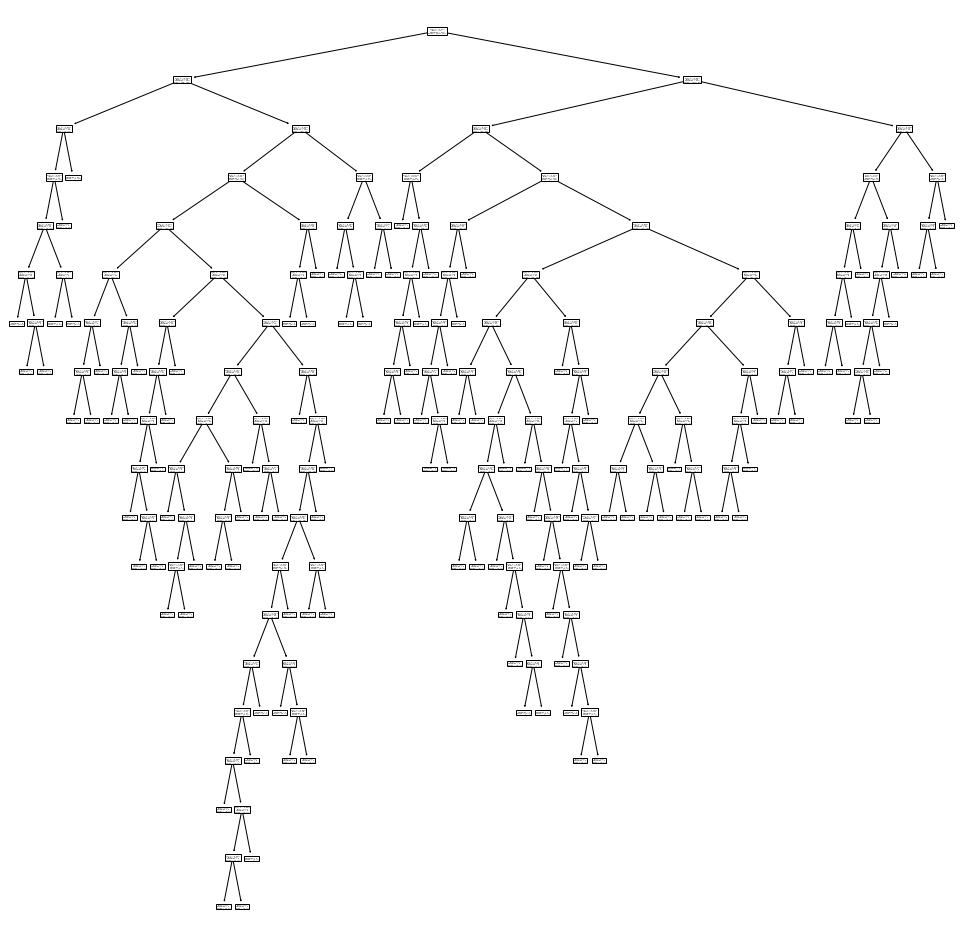

In [73]:
plt.figure(figsize=(17, 17))
plot_tree(arv_dec)
plt.show()

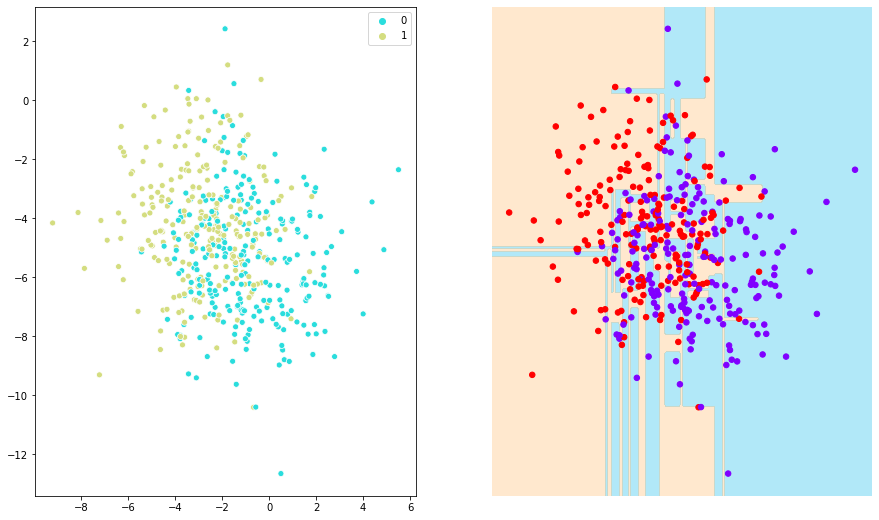

In [76]:
fig, g = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='rainbow', ax=g[0])
visualize_classifier(arv_dec, x_treino, y_treino, ax=g[1])
plt.show()

**teste**

In [77]:
previsto_dec_tree = arv_dec.predict(x_teste)

## Métricas

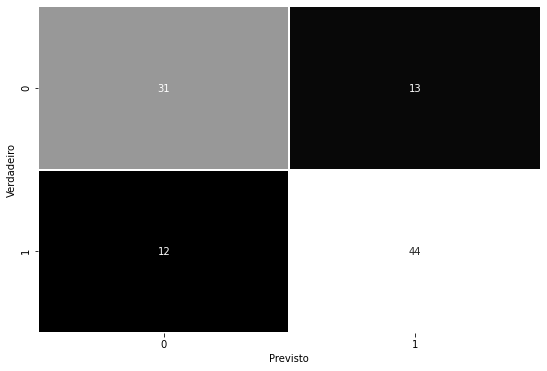

In [78]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred=previsto_dec_tree, y_true=y_teste), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [79]:
(TN_dec_tree, FP_dec_tree), (FN_dec_tree, TP_dec_tree) = confusion_matrix(y_pred=previsto_dec_tree, y_true=y_teste)

In [80]:
print(f'(TN) é 0 e foi classificado como 0: ', TN_dec_tree)
print(f'(TP) é 1 e foi classificado como 1: ', TP_dec_tree)
print(f'(FP) é 0 mas foi classificado como 1: ', FP_dec_tree)
print(f'(FN) é 1 mas foi classificado como 0: ', FN_dec_tree)

(TN) é 0 e foi classificado como 0:  31
(TP) é 1 e foi classificado como 1:  44
(FP) é 0 mas foi classificado como 1:  13
(FN) é 1 mas foi classificado como 0:  12


**Accuracy**

In [81]:
accuracy_score(y_pred=previsto_dec_tree, y_true=y_teste)

0.75

**Recall**

In [82]:
recall_score(y_pred=previsto_dec_tree, y_true=y_teste)

0.7857142857142857

**Fall out**

In [83]:
FP_dec_tree/(TN_dec_tree+FP_dec_tree)

0.29545454545454547

**Precision**

In [84]:
precision_score(y_pred=previsto_dec_tree, y_true=y_teste)

0.7719298245614035

**ROC curve**

Primeiro, precisamos encontrar a probabilidade associada ao ponto. Nesse caso, vamos usar a probabilidade de ser da **classe 1**

In [85]:
previsto_probab_dec_tree = arv_dec.predict_proba(x_teste)[:, 1]

In [86]:
TPR_dec_tree, FPR_dec_tree, thresholds_dec_tree = roc_curve(y_score=previsto_probab_dec_tree, y_true=y_teste)

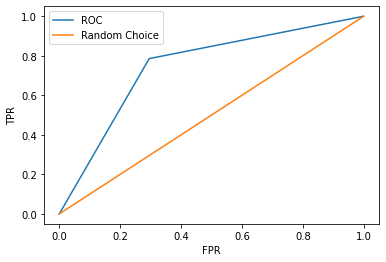

In [87]:
plt.plot(TPR_dec_tree, FPR_dec_tree, label='ROC')
plt.plot([0, 1], [0, 1], label='Random Choice')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Área abaixo da ROC curve**

In [88]:
roc_auc_score(y_true=y_teste, y_score=previsto_dec_tree)

0.7451298701298702

### Vantagens e Desvantagens da *Decision Tree*

**Vantagens:**

- não precisa de normalização, ou padronização

**Desvantagens:**

- ocorre *overfitting* mais facilmente

- não é indicada quando os dados estão desbalanceados

- a divisão das regioões de decisão **são sempre ortogonais**

## Bagging

Como dito, classificar por **árvores de decisão** pode gerar *overfitting*, já que esse classificador tem a característica de produzir modelos de **alta variância** e **baixa linearidade**. Diante disso, num classificador tipo **Bagging**, está inserido nele uma técnica chamada **bootstrapping**. Essa técnica consiste em **reamostrar, com reposição, o conjunto de treinamento, e treinar um modelo para cada amostra gerada do conjunto de treino**, e o classe com maior votação é escolhida.

**Nota:** *bagging* funciona com qualquer modelo de classificação, mas é muito mais relevante usá-lo com *árvores de decisão*

In [89]:
from sklearn.ensemble import BaggingClassifier

nesse, criaremos **400 árvores de decisão**, e cada uma terá, com reposição, **150 indivíduos**

In [90]:
bagging_dec_tree = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=None), 
                                     n_estimators=400, 
                                    max_samples=150, 
                                    bootstrap=True)

**treino**

In [91]:
bagging_dec_tree.fit(x_treino, y_treino)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=150,
                  n_estimators=400)

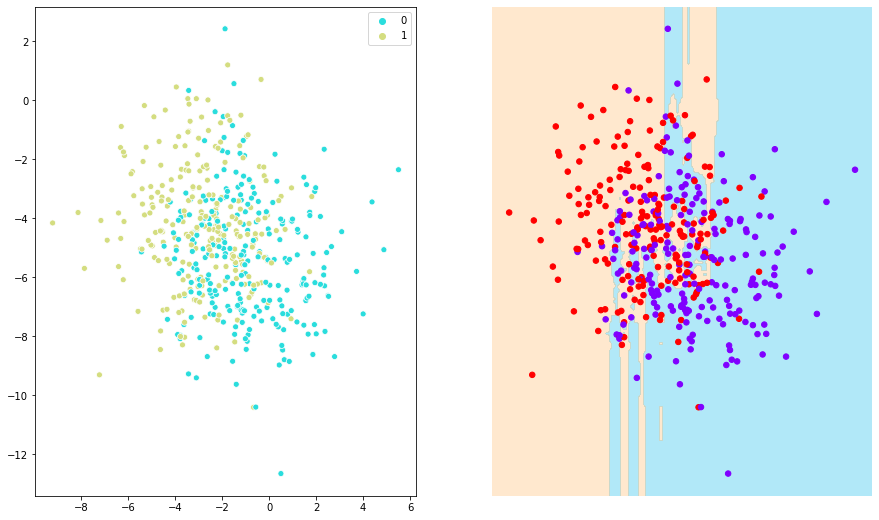

In [92]:
fig, g = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='rainbow', ax=g[0])
visualize_classifier(bagging_dec_tree, x_treino, y_treino, ax=g[1])
plt.show()

**teste**

In [93]:
previsto_bagging_dec_tree = bagging_dec_tree.predict(x_teste)

## Métricas

**Confusion Matrix**

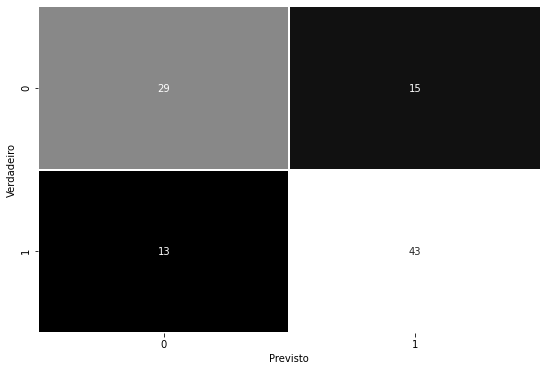

In [94]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred=previsto_bagging_dec_tree, y_true=y_teste), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [95]:
(TN_bagging_dec_tree, FP_bagging_dec_tree), (FN_bagging_dec_tree, TP_bagging_dec_tree) = confusion_matrix(y_pred=previsto_bagging_dec_tree, y_true=y_teste)

In [96]:
print(f'(TN) é 0 e foi classificado como 0: ', TN_bagging_dec_tree)
print(f'(TP) é 1 e foi classificado como 1: ', TP_bagging_dec_tree)
print(f'(FP) é 0 mas foi classificado como 1: ', FP_bagging_dec_tree)
print(f'(FN) é 1 mas foi classificado como 0: ', FN_bagging_dec_tree)

(TN) é 0 e foi classificado como 0:  29
(TP) é 1 e foi classificado como 1:  43
(FP) é 0 mas foi classificado como 1:  15
(FN) é 1 mas foi classificado como 0:  13


**Accuracy**

In [97]:
accuracy_score(y_pred=previsto_bagging_dec_tree, y_true=y_teste)

0.72

**Recall**

In [98]:
recall_score(y_pred=previsto_bagging_dec_tree, y_true=y_teste)

0.7678571428571429

**Fall Out**

In [99]:
FP_bagging_dec_tree/(FP_bagging_dec_tree + TN_bagging_dec_tree)

0.3409090909090909

**Precision**

In [100]:
precision_score(y_pred=previsto_bagging_dec_tree, y_true=y_teste)

0.7413793103448276

**ROC curve**

Primeiro, precisamos encontrar a probabilidade associada ao ponto. Nesse caso, vamos usar a probabilidade de ser da **classe 1**

In [101]:
previsto_probab_bagging_dec_tree = bagging_dec_tree.predict_proba(x_teste)[:, 1]

In [102]:
TPR_baggin_dec_tree, FPR_baggin_dec_tree, thresholds_baggin_dec_tree = roc_curve(y_score=previsto_probab_bagging_dec_tree, y_true=y_teste)

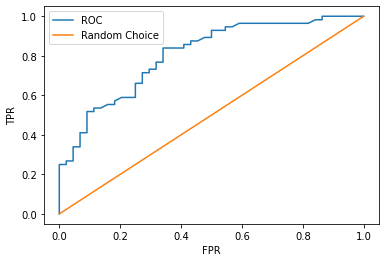

In [103]:
plt.plot(TPR_baggin_dec_tree, FPR_baggin_dec_tree, label='ROC')
plt.plot([0, 1], [0, 1], label='Random Choice')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Área abaixo da ROC**

In [104]:
roc_auc_score(y_true=y_teste, y_score=previsto_bagging_dec_tree)

0.7134740259740261

## Random Forest

Apesar de *bagging* funcionar muito bem na maioria dos casos, podemos melhorá-lo ainda mais. A ideia das **Random Forests** é subdividir também as *features* usadas durante o treinamento das árvores de decisão. E a cada *split* da árvore de decisão, **apenas um subconjunto das *features* é considerado**. Isso ajuda a criar árvores mais variadas, ou seja, menos correlacionadas. Ao fazermos o *ensemble* dessas árvores, temos um erro total ainda menor.

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
random_forest = RandomForestClassifier(n_estimators=1000, criterion='gini', bootstrap=True)

**treino**

In [107]:
random_forest.fit(x_treino, y_treino)

RandomForestClassifier(n_estimators=1000)

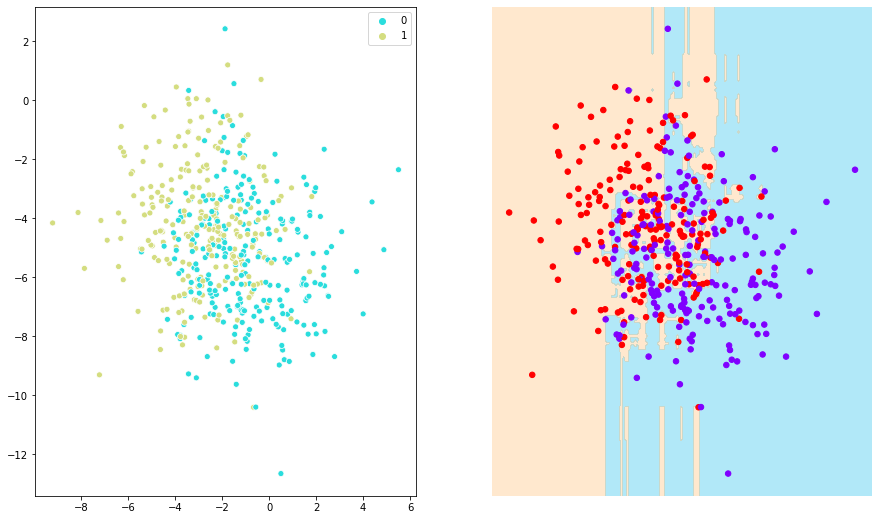

In [108]:
fig, g = plt.subplots(1, 2, figsize=(15, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Y, palette='rainbow', ax=g[0])
visualize_classifier(random_forest, x_treino, y_treino, ax=g[1])
plt.show()

**teste**

In [109]:
previsto_rand_forest = random_forest.predict(x_teste)

## Métricas

**Confusion Matrix**

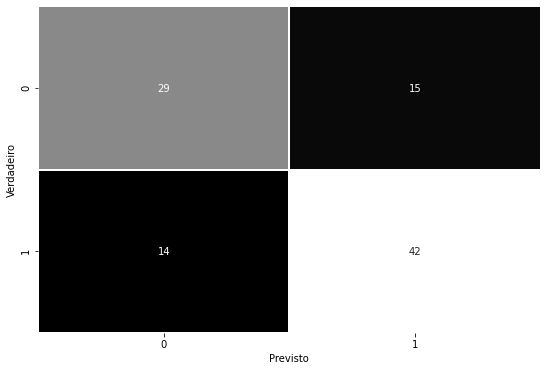

In [110]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred=previsto_rand_forest, y_true=y_teste), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [111]:
(TN_rand_forest, FP_rand_forest), (FN_rand_forest, TP_rand_forest) = confusion_matrix(y_pred=previsto_rand_forest, y_true=y_teste)

In [112]:
print(f'(TN) é 0 e foi classificado como 0: ', TN_rand_forest)
print(f'(TP) é 1 e foi classificado como 1: ', TP_rand_forest)
print(f'(FP) é 0 mas foi classificado como 1: ', FP_rand_forest)
print(f'(FN) é 1 mas foi classificado como 0: ', FN_rand_forest)

(TN) é 0 e foi classificado como 0:  29
(TP) é 1 e foi classificado como 1:  42
(FP) é 0 mas foi classificado como 1:  15
(FN) é 1 mas foi classificado como 0:  14


**Accuracy**

In [113]:
accuracy_score(y_pred=previsto_rand_forest, y_true=y_teste)

0.71

**Recall**

In [114]:
recall_score(y_pred=previsto_rand_forest, y_true=y_teste)

0.75

**Fall Out**

In [115]:
FP_rand_forest/(FP_rand_forest + TN_rand_forest)

0.3409090909090909

**Precision**

In [116]:
precision_score(y_pred=previsto_rand_forest, y_true=y_teste)

0.7368421052631579

**ROC curve**

Primeiro, precisamos encontrar a probabilidade associada ao ponto. Nesse caso, vamos usar a probabilidade de ser da **classe 1**

In [117]:
previsto_probab_rand_forest = random_forest.predict_proba(x_teste)[:, 1]

In [118]:
TPR_rand_forest, FPR_rand_forest, thresholds_rand_forest = roc_curve(y_score=previsto_rand_forest, y_true=y_teste)

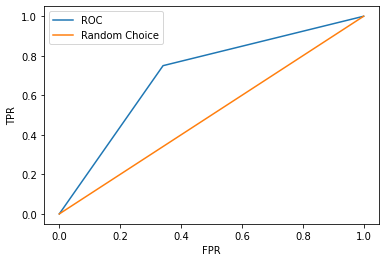

In [119]:
plt.plot(TPR_rand_forest, FPR_rand_forest, label='ROC')
plt.plot([0, 1], [0, 1], label='Random Choice')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Área abaixo da ROC**

In [120]:
roc_auc_score(y_true=y_teste, y_score=previsto_rand_forest)

0.7045454545454546

## Dados Desbalanceados

Em todo *dataset*, é possível que existam dados desbalanceados, não estou falando fora de escala, mas com mais de uma classe que de outro, e isso atrapalha a performance de um classificador. Exemplo:
    
    Se analisarmos transações bancárias, são poucas as classificadas como fraudulentas (~0.5%). Ou seja, num conjunto de dados como esse, a esmagadora maioria é classificada como transação saudável. Isso representa um dataset desbalanceado. Nada mais é quando temos valores demais de uma classe frente a outra.

**Por que isso atrapalha um classificador?**

Como existe uma grande superioridade de uma classe, o classificador *aprende* essa proporção. E com os dados de treino, a performance acaba sendo muito alta. Porém, isso é ilusório,  já que existem muitos indivíduos numa classe (98% por exemplo). Note: o classificador pode dizer que 98% dos indivíduos são de uma única classe, e se por um acaso o classificador errar, vai errar no máximo, em 2% dos casos. Nessa situação, se utilizarmos todas as métricas de validação vistas acima, todas elas serão favoráveis ao classificador, pois tem 98% de proporção na classe majoritária. Mas a questão é: os raríssimos casos classificados pertencentes à classe minoritária, serão classificados corretamente? e é aí que está o problema fatal. Tendo o exemplo das transações bancárias em mente, é crucial saber classificar bem os ~0.5% fraudulentos, pois classificar um raríssimo FN ou FP, que ocorrerão dentro desses ~0.5%, é o que devemos evitar para criarmos um bom classificador.

**Como resolver isso?**

Como o *dataset* está desbalanceado, devemos **rebalanceá-lo** primeiro. E isso pode ser feito de duas maneiras:

- Undersampling: remoção dos dados majoritários

- Oversampling: criação de dados *similares* aos minoritários

Como as duas abordagens são aleatórias (retirada aleatória de dados ou criação aleatória deles), usaremos a de *oversampling*. Como já discutido nos outros módulos, retirar dados não é uma boa prática. Então, falando na criação de dados da classe minoritária, vamos usar uma técnica chamada **SMOTE**

**SMOTE - Synthetic Minority Oversampling Technique**

![smote](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

- Para cada $p_i$ da classe minoritária, a técnica encontra os $k$ vizinhos mais próximos.

- Para cada um dos $k$ vizinhos mais próximos de $p_i$, os $p_{ik}=\{p_{i1}, p_{i2}, \dots, p_{ik}\}, k \in \mathbb{N}^*$, é adicionado um novo ponto $p'{ik}$, a uma distância aleatória, entre $p_i$ e $p_{ik}$.

- Esse procedimento é repetido até que a quantidade de pontos sintéticos seja satisfeita

**Ponto Positivo:**

Essa técnica mitiga o *overfitting* natural que pode ocorrer quando se implementa um *oversampling*

Vamos analisar se o conjunto que usamos para aprender as técnicas de classificação está balanceado. Para saber isso, basta olharmos a quantidade de indivíduos que temos de cada classe

In [121]:
pd.Series(data=Y).value_counts()

1    250
0    250
dtype: int64

Podemos ver que esse conjunto está muito balanceado. Vamos criar um desbalanceado.

## Criando Dataset Desbalanceado

Esse novo *dataset* tem as seguintes características: **1000 indivíduos**, **10 variáveis**, **sem variáveis L.D. (n_redundant=0)**, **sem valores repetidos**, **balanço 9:1**, **1 aglomerado por classe** e **1.6 de separação de classes**

In [190]:
from sklearn.datasets import make_classification

In [205]:
desbalanceados = make_classification(n_samples=1000, 
                    n_features=10, 
                    n_informative=10, 
                    n_redundant=0, 
                    n_repeated=0, 
                    weights=(.9, .1), 
                    n_clusters_per_class=1, 
                    class_sep=1.6)

In [206]:
pd.DataFrame(data=desbalanceados[0], columns=[f'X{i}' for i in range(1, 11)]).join(pd.Series(data=desbalanceados[1], name='Target')).head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Target
0,1.383442,0.952516,0.277167,-2.857919,-2.040122,2.717970,-0.118661,-3.026818,1.502134,-2.494301,0
1,0.514920,3.283887,1.175883,-0.650346,0.089684,0.315314,1.577696,0.696496,0.155864,-1.371486,0
2,1.648326,2.119912,-0.717495,0.282171,-1.107685,1.261305,2.637091,-0.975623,0.018785,-1.916944,0
3,1.386498,1.697982,1.872900,-0.955771,-0.731010,2.984180,4.346182,-1.876630,0.893496,-3.220810,0
4,-4.206795,2.837884,2.933630,-2.551757,1.194208,0.537364,4.467568,-4.947831,-7.500405,3.948194,1


In [207]:
x = desbalanceados[0]
y = desbalanceados[1]

In [208]:
pd.Series(data=y).value_counts()

0    894
1    106
dtype: int64

Como esse *dataset* está no $\mathbb{R}^{10}$, vamos reduzir suas dimensões para o $\mathbb{R}^{2}$ para podermos visualizar a distribuição desses dados

In [209]:
from sklearn.decomposition import PCA

In [210]:
pca = PCA(n_components=2)

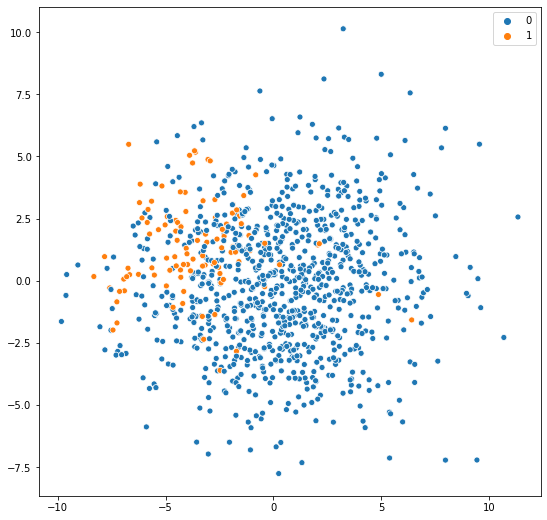

In [211]:
plt.figure(figsize=(9, 9))
sns.scatterplot(x=pca.fit_transform(x)[:, 0], y=pca.fit_transform(x)[:, 1], hue=y)
plt.show()

Vamos criar um classificador de Regressão Logística só para percebermos as consequências de tentar criar um classificador com dados desbalanceados

## Separação dados Desbalanceados para Treino e Teste

In [212]:
x_treino_desb, x_teste_desb, y_treino_desb, y_teste_desb = train_test_split(x, y, test_size=.2)

**treino**

In [213]:
reg_log.fit(x_treino_desb, y_treino_desb)

LogisticRegression()

**teste**

In [214]:
previsto_log_desb = reg_log.predict(x_teste_desb)

## Métricas

**Confusion Matrix**

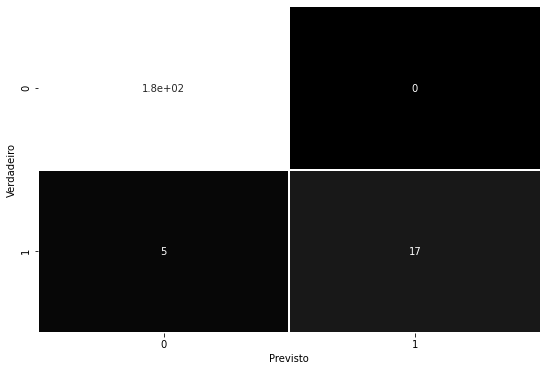

In [215]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred=previsto_log_desb, y_true=y_teste_desb), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [216]:
(TN_log_desb, FP_log_desb), (FN_log_desb, TP_log_desb) = confusion_matrix(y_pred=previsto_log_desb, y_true=y_teste_desb)

In [217]:
print(f'(TN) é 0 e foi classificado como 0: ', TN_log_desb)
print(f'(TP) é 1 e foi classificado como 1: ', TP_log_desb)
print(f'(FP) é 0 mas foi classificado como 1: ', FP_log_desb)
print(f'(FN) é 1 mas foi classificado como 0: ', FN_log_desb)

(TN) é 0 e foi classificado como 0:  178
(TP) é 1 e foi classificado como 1:  17
(FP) é 0 mas foi classificado como 1:  0
(FN) é 1 mas foi classificado como 0:  5


**Accuracy**

In [218]:
accuracy_score(y_pred=previsto_log_desb, y_true=y_teste_desb)

0.975

**Recall**

In [219]:
recall_score(y_pred=previsto_log_desb, y_true=y_teste_desb)

0.7727272727272727

**Fall Out**

In [220]:
FP_log_desb / (FP_log_desb + TN_log_desb)

0.0

**Precision**

In [221]:
precision_score(y_pred=previsto_log_desb, y_true=y_teste_desb)

1.0

**ROC Curve**

Primeiro, precisamos encontrar a probabilidade associada ao ponto. Nesse caso, vamos usar a probabilidade de ser da **classe 1**

In [222]:
previsto_probab_desb = reg_log.predict_proba(x_teste_desb)[:, 1]

In [223]:
TPR_log_desb, FPR_log_desb, thresholds_log_desb = roc_curve(y_score=previsto_log_desb, y_true=y_teste_desb)

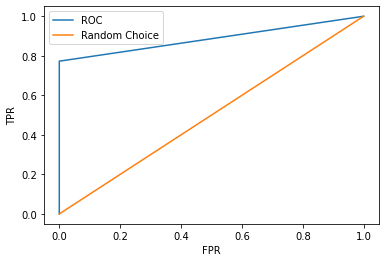

In [224]:
plt.plot(TPR_log_desb, FPR_log_desb, label='ROC')
plt.plot([0, 1], [0, 1], label='Random Choice')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Área abaixo da ROC Curve**

In [225]:
roc_auc_score(y_true=y_teste_desb, y_score=previsto_log_desb)

0.8863636363636364

Obtidas essas métricas, vamos olhar para outras duas que lidam especialmente com (FN): **Miss Rate**

In [226]:
FN_log_desb / (FN_log_desb + TP_log_desb)

0.22727272727272727

Agora, vamos balancear o *dataset*

## Balanceando `x_treino` e `y_treino` Desbalanceados

In [229]:
from imblearn.over_sampling import SMOTE

In [230]:
smote = SMOTE(sampling_strategy='minority')

In [241]:
x_balanc, y_balanc = smote.fit_resample(x_treino_desb, y_treino_desb)

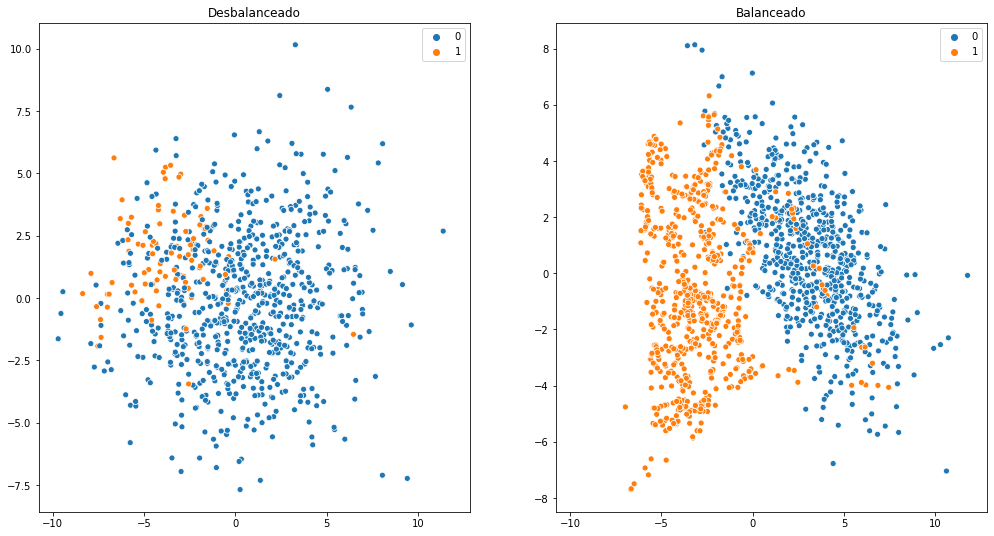

In [242]:
fig, g = plt.subplots(1, 2, figsize=(17, 9), sharex=True)
sns.scatterplot(x=pca.fit_transform(x_treino_desb)[:, 0], y=pca.fit_transform(x_treino_desb)[:, 1], hue=y_treino_desb, ax=g[0])
sns.scatterplot(x=pca.fit_transform(x_balanc)[:, 0], y=pca.fit_transform(x_balanc)[:, 1], hue=y_balanc, ax=g[1])
g[0].set_title('Desbalanceado')
g[1].set_title('Balanceado')
plt.show()

In [243]:
pd.Series(y_balanc).value_counts()

1    716
0    716
dtype: int64

**treino**

In [244]:
reg_log.fit(x_balanc, y_balanc)

LogisticRegression()

**teste**

In [245]:
previsto_log_balanc= reg_log.predict(x_teste_desb)

## Métricas

**Confusion Matrix**

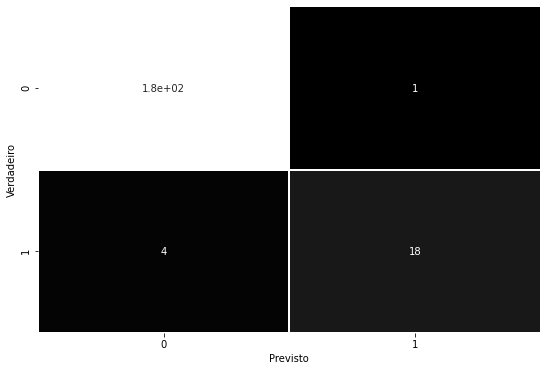

In [246]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_pred=previsto_log_balanc, y_true=y_teste_desb), 
            annot=True, 
            cmap='gray', 
            linewidths=.7, 
            cbar=False)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

In [247]:
(TN_log_balanc, FP_log_balanc), (FN_log_balanc, TP_log_balanc) = confusion_matrix(y_pred=previsto_log_balanc, y_true=y_teste_desb)

In [248]:
print(f'(TN) é 0 e foi classificado como 0: ', TN_log_balanc)
print(f'(TP) é 1 e foi classificado como 1: ', TP_log_balanc)
print(f'(FP) é 0 mas foi classificado como 1: ', FP_log_balanc)
print(f'(FN) é 1 mas foi classificado como 0: ', FN_log_balanc)

(TN) é 0 e foi classificado como 0:  177
(TP) é 1 e foi classificado como 1:  18
(FP) é 0 mas foi classificado como 1:  1
(FN) é 1 mas foi classificado como 0:  4


**Accuracy**

In [249]:
accuracy_score(y_pred=previsto_log_balanc, y_true=y_teste_desb)

0.975

**Recall**

In [250]:
recall_score(y_pred=previsto_log_balanc, y_true=y_teste_desb)

0.8181818181818182

**Fall Out**

In [251]:
FP_log_balanc / (FP_log_balanc + TN_log_balanc)

0.0056179775280898875

**Precision**

In [252]:
precision_score(y_pred=previsto_log_balanc, y_true=y_teste_desb)

0.9473684210526315

**ROC Curve**

Primeiro, precisamos encontrar a probabilidade associada ao ponto. Nesse caso, vamos usar a probabilidade de ser da **classe 1**

In [253]:
previsto_probab_balanc = reg_log.predict_proba(x_teste_desb)[:, 1]

In [254]:
TPR_log_balanc, FPR_log_balanc, thresholds_log_balanc = roc_curve(y_score=previsto_log_balanc, y_true=y_teste_desb)

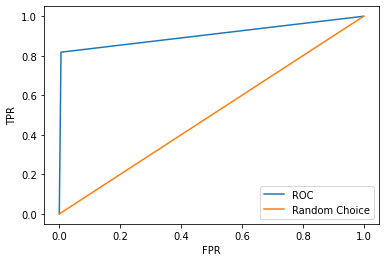

In [255]:
plt.plot(TPR_log_balanc, FPR_log_balanc, label='ROC')
plt.plot([0, 1], [0, 1], label='Random Choice')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

**Área abaixo da ROC Curve**

In [256]:
roc_auc_score(y_true=y_teste_desb, y_score=previsto_log_balanc)

0.9062819203268642

Obtidas essas métricas, vamos olhar para outras duas que lidam especialmente com (FN): **Miss Rate**

In [257]:
FN_log_balanc / (FN_log_balanc + TP_log_balanc)

0.18181818181818182